In [7]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import twitterkey2
auth = OAuthHandler( twitterkey2.consumer_key, twitterkey2.consumer_secret)
auth.set_access_token(twitterkey2.access_token, twitterkey2.access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

### collect tweet information from selected Mazda accounts 

In [2]:
mazda = ['Mazda_Europe', 'MazdaUSA', 'Mazda_UK', 'Mazda_Ireland', 'MazdaNL', 'MazdaOficial']
tweetCount = 10000
result = []

for id in mazda:
    cnt = 0
    try:
        tweet = api.user_timeline(id=id, count=tweetCount, wait_on_rate_limit_notify=True, wait_on_rate_limit=True, exclude_replies=True, include_rts = False)
        
        for line in tweet:
            search = [line.user.name, line.user.followers_count, line.created_at, line.retweet_count, line.favorite_count]
            result.append(search)
                                 
    except tweepy.TweepError:
        print("fail" + id)
       
df = pd.DataFrame(result)
df.columns = ['account_name', 'followers', 'created_at', 'retweet_count', 'favorite_count']
 

In [3]:
pd.set_option('display.max_columns', 10)
df.head()

,account_name,followers,created_at,retweet_count,favorite_count
0,Mazda Motor Europe,34505,2020-10-31 19:20:05,6,27
1,Mazda Motor Europe,34505,2020-10-28 19:26:03,1,25
2,Mazda Motor Europe,34505,2020-10-24 06:46:02,6,36
3,Mazda Motor Europe,34505,2020-10-21 06:08:02,5,27
4,Mazda Motor Europe,34505,2020-10-20 18:06:04,1,21


###  data processing

In [14]:
last_year = str((datetime.now() - timedelta(days=365)).date())
df_sep = df[(df['created_at'] > last_year)]
df_agg = df_sep.groupby(['account_name', 'followers'], as_index= False).agg({"created_at": "count", 
                                                   "retweet_count" : ["mean", "max", "std"],
                                                   "favorite_count" : ["mean", "max", "std"]})
#list(df_agg)
df_agg

account_name followers created_at retweet_count                 \
                                     count          mean max        std   
0       Mazda Ireland      3849         66      1.818182   6   1.487477   
1  Mazda Motor Europe     34505        175      5.948571  33   4.332805   
2        Mazda México    201416         23     14.913043  80  20.478177   
3     Mazda Nederland      8315        118      0.872881   5   0.991818   
4            Mazda UK     20459         34      9.882353  34   6.502982   
5           Mazda USA    337550          5     10.200000  26   9.679876   

  favorite_count                    
            mean   max         std  
0       5.666667    16    3.561907  
1      36.628571   133   16.296262  
2     172.217391  1256  278.052800  
3       5.059322    22    4.007029  
4      46.558824   109   27.159675  
5      78.800000   171   56.215656

### number of followers and amount of post in past 3 month 
- European twitter account has overall comparatively higher post number which may result from the existent of a PR account to divide the work  
- account in The Americas has relatively higher follower may be the result of larger population base

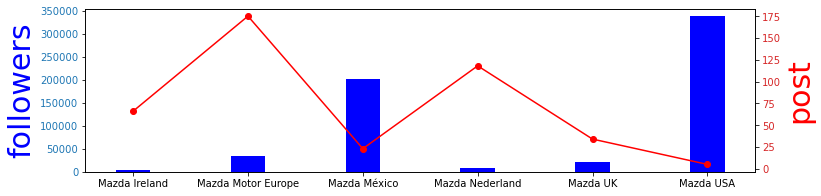

In [16]:
plt.figure(figsize=(12, 3))
w = 0.3
ax = plt.subplot(111)
ax.bar(df_agg['account_name']  , df_agg['followers'], width=w, color='b', align='center')
ax.set_ylabel('followers', color='b', size=30)
ax.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax.twinx()
ax2.plot(df_agg['account_name'], df_agg[ ('created_at', 'count')], marker='o', color='r')
ax2.set_ylabel('post', color='r', size=30)
ax2.tick_params(axis='y', labelcolor='tab:red')

### comparing tweet interaction across accounts from 2019/09
- plotting the average number of retweet and favorite gaining from a post with its standord deviation
- the amount of interaction is largely effect by the follower number

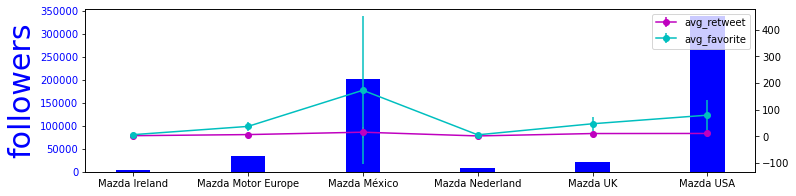

In [18]:
plt.figure(figsize=(12, 3))
ax = plt.subplot(111)
ax.bar(df_agg['account_name']  , df_agg['followers'], width=w, color='b', align='center')
ax.set_ylabel('followers', color='b', size=30)
ax.tick_params(axis='y', labelcolor='b')

ax2 = ax.twinx()
ax2.errorbar(df_agg['account_name']  , df_agg[('retweet_count', 'mean')], df_agg[ ('retweet_count', 'std')], marker='o', color = 'm', label='avg_retweet')
ax2.errorbar(df_agg['account_name'], df_agg[ ('favorite_count', 'mean')], df_agg[ ('favorite_count', 'std')], marker='o', color='c', label='avg_favorite')
ax2.legend()
plt.show()

### adjust interaction performance by follower number
- after excluding the difference in audince base number,it's clear that UK has oustanding performance in managing the platform

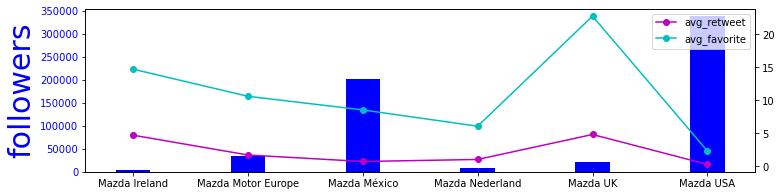

In [19]:
df_agg[('retweet_count', 'adjust_mean')] = df_agg[('retweet_count', 'mean')] / df_agg['followers']*10000
df_agg[('favorite_count', 'adjust_mean')] = df_agg[('favorite_count', 'mean')] / df_agg['followers']*10000

plt.figure(figsize=(12, 3))
ax = plt.subplot(111)
ax.bar(df_agg['account_name']  , df_agg['followers'], width=w, color='b', align='center')
ax.set_ylabel('followers', color='b', size=30)
ax.tick_params(axis='y', labelcolor='b')

ax2 = ax.twinx()
ax2.plot(df_agg['account_name']  , df_agg[('retweet_count', 'adjust_mean')], marker='o', color = 'm', label='avg_retweet')
ax2.plot(df_agg['account_name'], df_agg[ ('favorite_count', 'adjust_mean')], marker='o', color='c', label='avg_favorite')
ax2.legend()
plt.show()